<a href="https://colab.research.google.com/github/amannarsaria4/fast.ai/blob/master/Lesson%202/(MyCode)lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from fastai.basics import *

In [10]:
n = 100
x = torch.ones(n,2)
x[:,0].uniform_(-1,1)
x[:5]

tensor([[-0.3606,  1.0000],
        [-0.7591,  1.0000],
        [ 0.0863,  1.0000],
        [-0.4110,  1.0000],
        [ 0.8075,  1.0000]])

In [11]:
a = tensor(3.,2)
a

tensor([3., 2.])

In [15]:
y = x@a + 0.25*torch.randn(n)
y[:5]

tensor([ 0.4232, -0.1478,  2.4963,  0.7603,  4.7981])

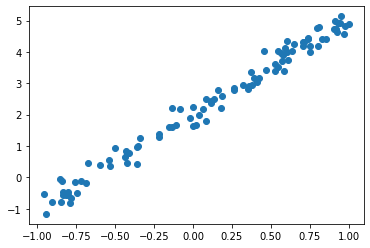

In [16]:
plt.scatter(x[:,0],y)

In [17]:
def mse(y_hat,y):
  return ((y_hat - y)**2).mean()

In [18]:
a = tensor(-1.,1)
y_hat = x@a
mse(y_hat,y)

tensor(8.0842)

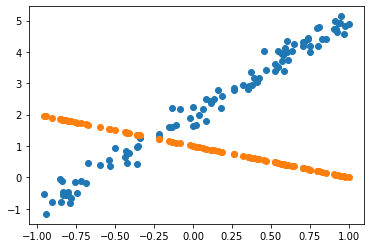

In [19]:
plt.scatter(x[:,0], y);
plt.scatter(x[:,0], y_hat);

In [21]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [26]:
def update():
  y_hat = x@a
  loss = mse(y_hat, y)
  if t%10 == 0:
    print (loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr*a.grad)
    a.grad.zero_()

In [27]:
lr = 1e-1
for t in range (100):
  update()

tensor(0.0590, grad_fn=<MeanBackward0>)
tensor(0.0590, grad_fn=<MeanBackward0>)
tensor(0.0590, grad_fn=<MeanBackward0>)
tensor(0.0590, grad_fn=<MeanBackward0>)
tensor(0.0590, grad_fn=<MeanBackward0>)
tensor(0.0590, grad_fn=<MeanBackward0>)
tensor(0.0590, grad_fn=<MeanBackward0>)
tensor(0.0590, grad_fn=<MeanBackward0>)
tensor(0.0590, grad_fn=<MeanBackward0>)
tensor(0.0590, grad_fn=<MeanBackward0>)


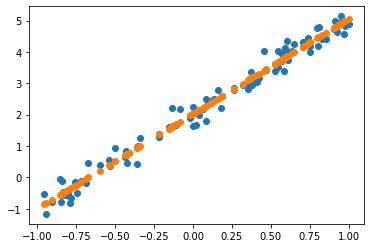

In [29]:
plt.scatter(x[:,0], y);
plt.scatter(x[:,0], x@a.detach());


In [30]:
from matplotlib import animation, rc
rc('animation' , html = 'jshtml')


In [35]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0],y,c = 'orange')
line, = plt.plot(x[:,0],x@a.detach())
plt.close()

def animate(i):
  update()
  line.set_ydata(x@a.detach())
  return line,

animation.FuncAnimation(fig, animate, np.arange(0,100), interval = 20)